### CA1 – Machine Learning HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CristhianMacedo2024104/Machine-Learning)

## 1. Data Understanding

### 1.1 Importing libraries

Importing the required libraries "`pandas`" to start the project.

Also importing "`numpy`", "`seaborn`", "`matplotlib.pyplot`" and "`sklearn.decomposition`", in case it needs other libraries it will be imported when necessary it comes.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

### 1.2	Loading Data from a CSV File

Loading the dataset using the function “`.read_csv`” to import the required data existing in the Comma-separated values "`.csv`" file in the `df` variable.

In [2]:
df = pd.read_csv("HPM04.20240406T220445.csv")

### 1.3	Inspecting the Data Set

The first command useful to start understanding the data is “`.head()`” to check the first 5 observations as default and features contained in the data frame after loaded. 

This command was important and necessary to get the first impression of it, returning that this dataset has **5** rows (observations) and **14** columns (features).

In [3]:
df.head(2)

,STATISTIC,Statistic Label,TLIST(M1),Month,C03346V04033,Dwelling Status,C03349V04063,Eircode Output,C03341V04028,Stamp Duty Event,C03344V04031,Type of Buyer,UNIT,VALUE
0,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,-,All Buyer Types,Number,3519.0
1,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,02,Household Buyer - First-Time Buyer Owner-Occupier,Number,1181.0


Thereafter using the command “`shape`” shows us the complete body of the data, in this case **336000** observations and **14** features to be analysed.

In [4]:
df.shape

(336000, 14)

Used “```.info()```” next to print a concise summary of a data frame.

Getting this information it was necessary to learn the names of features existing and the difference between the total of observations shown before in the “`shape`” command and their respective data types.

In [5]:
# df.info()

The "`.describe()`" function shows us a little more about each feature, we can see statistics information about: count, mean, standard deviation, min, Q1 25%, Q2 50%, Q3 75% and max 

In [6]:
# df.describe()

In [7]:
# pip install ydata-profiling

In [8]:
# from ydata_profiling import ProfileReport

# ProfileReport(df)

### 1.4 Checking the types of data

In [9]:
df.dtypes

STATISTIC            object
Statistic Label      object
TLIST(M1)             int64
Month                object
C03346V04033         object
Dwelling Status      object
C03349V04063         object
Eircode Output       object
C03341V04028          int64
Stamp Duty Event     object
C03344V04031         object
Type of Buyer        object
UNIT                 object
VALUE               float64
dtype: object

In [10]:
df['Type of Buyer'].unique()

array(['All Buyer Types',
       'Household Buyer - First-Time Buyer Owner-Occupier',
       'Household Buyer - Former Owner-Occupier',
       'Household Buyer - Non-Occupier'], dtype=object)

## 2. Data Preparation

### 2.1 Finding Unique Values

- Keeping the columns:  STATISTIC, TLIST(M1), Month, C03346V04033, C03349V04063, Eircode Output, C03341V04028, C03344V04031, UNIT and VALUE

In [11]:
df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(M1)', 'Month', 'C03346V04033',
       'Dwelling Status', 'C03349V04063', 'Eircode Output', 'C03341V04028',
       'Stamp Duty Event', 'C03344V04031', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

In [12]:
df["UNIT"].value_counts()

UNIT
Euro            168000
Number           84000
Euro Million     84000
Name: count, dtype: int64

In [13]:
df['Type of Buyer'].unique()

array(['All Buyer Types',
       'Household Buyer - First-Time Buyer Owner-Occupier',
       'Household Buyer - Former Owner-Occupier',
       'Household Buyer - Non-Occupier'], dtype=object)

'Dwelling Status ID', 'Eircode ID', 'Type of Buyer ID' with '-' values 

In [14]:
df.isnull().sum()

STATISTIC               0
Statistic Label         0
TLIST(M1)               0
Month                   0
C03346V04033            0
Dwelling Status         0
C03349V04063            0
Eircode Output          0
C03341V04028            0
Stamp Duty Event        0
C03344V04031            0
Type of Buyer           0
UNIT                    0
VALUE               40562
dtype: int64

In [15]:
df.isnull().mean().round(2) * 100

STATISTIC            0.0
Statistic Label      0.0
TLIST(M1)            0.0
Month                0.0
C03346V04033         0.0
Dwelling Status      0.0
C03349V04063         0.0
Eircode Output       0.0
C03341V04028         0.0
Stamp Duty Event     0.0
C03344V04031         0.0
Type of Buyer        0.0
UNIT                 0.0
VALUE               12.0
dtype: float64

In [16]:
# pip install missingno

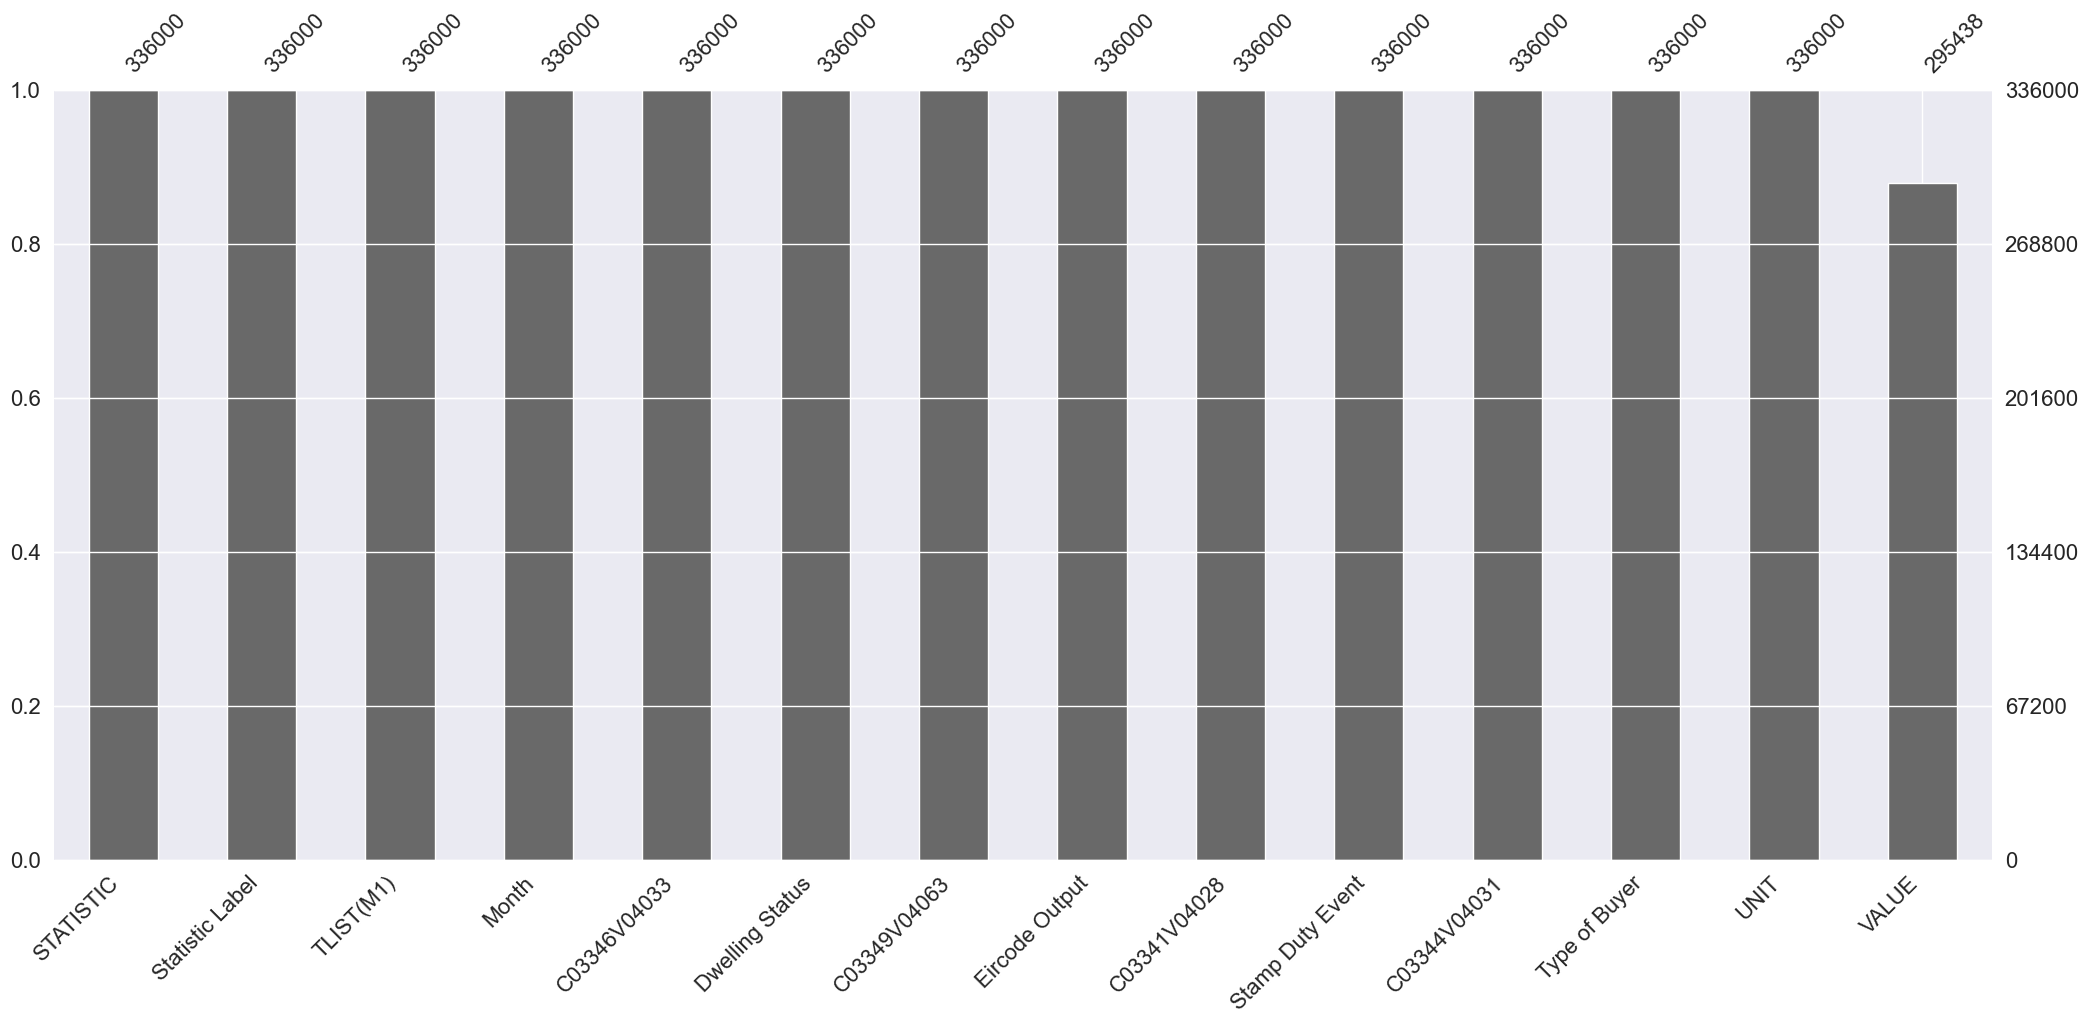

In [17]:
import missingno as msno
ax = msno.bar(df.sample(336000))

### 2.2 Replacing Values (Syntax errors)

- STATISTIC - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- C03346V04033 - 1: All Dwelling Statuses, 2: New and 3: Existing
- C03341V04028 - 1: Filings and 2: Executions
- C03344V04031 - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

In [18]:
df['STATISTIC'] = df['STATISTIC'].replace(["HPM04C01", 'HPM04C02', 'HPM04C03', 'HPM04C04'], [1, 2, 3, 4])
df['C03346V04033'] = df['C03346V04033'].replace(["-", '01', '02'], [1, 2, 3])
df['C03349V04063'] = df['C03349V04063'].replace(["-"], ["All"])
df['C03344V04031'] = df['C03344V04031'].replace(["-", '02', '03', '04'], [1, 2, 3, 4])

Importing `OrdinalEncoder` from `sklearn` to Encoder Categorical data

In [19]:
from sklearn.preprocessing import OrdinalEncoder

Created the variable `unit` to save just the specific values that exists in the `UNIT` feature 

In [20]:
unit = df['UNIT'].unique()
unit

array(['Number', 'Euro Million', 'Euro'], dtype=object)

Defined ordinal encoding and giving the specific values: 'Number', 'Euro Million', 'Euro'

In [21]:
encoder = OrdinalEncoder(categories = [unit])

Transforming and copying the values to the feature `'UNIT'` 

In [22]:
df['UNIT'] = encoder.fit_transform(df[['UNIT']])

Checking with the command "`.head()`" what the data set looks like now.

In [23]:
df.head(2)

,STATISTIC,Statistic Label,TLIST(M1),Month,C03346V04033,Dwelling Status,C03349V04063,Eircode Output,C03341V04028,Stamp Duty Event,C03344V04031,Type of Buyer,UNIT,VALUE
0,1,Volume of Sales,202201,2022 January,1,All Dwelling Statuses,All,All,1,Filings,1,All Buyer Types,0.0,3519.0
1,1,Volume of Sales,202201,2022 January,1,All Dwelling Statuses,All,All,1,Filings,2,Household Buyer - First-Time Buyer Owner-Occupier,0.0,1181.0


In [24]:
df['UNIT'].value_counts()

UNIT
2.0    168000
0.0     84000
1.0     84000
Name: count, dtype: int64

UNIT

Euro 168000, Number 84000 and Euro Million 84000

- Legend: Number = 0, Euro Million = 1 and Euro = 2

### 2.3 Dropping Irrelevant Columns

- Dropping:  Statistic Label, Dwelling Status, Stamp Duty Event and Type of Buyer

In [25]:
df = df.drop(columns = ['Statistic Label', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer'])

In [26]:
df.head()

,STATISTIC,TLIST(M1),Month,C03346V04033,C03349V04063,Eircode Output,C03341V04028,C03344V04031,UNIT,VALUE
0,1,202201,2022 January,1,All,All,1,1,0.0,3519.0
1,1,202201,2022 January,1,All,All,1,2,0.0,1181.0
2,1,202201,2022 January,1,All,All,1,3,0.0,1803.0
3,1,202201,2022 January,1,All,All,1,4,0.0,535.0
4,1,202201,2022 January,1,All,All,2,1,0.0,2884.0


### 2.4 Renaming Columns

- Renaming: STATISTIC to Statistic, TLIST(M1) to Year/Month, C03346V04033 to Dwelling Status, C03349V04063 to Eircode, C03341V04028 to Stamp Duty Event, C03344V04031 to Type of Buyer, UNIT to Unit, VALUE to Price

- Statistic - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- Dwelling Status - 1: All Dwelling Statuses, 2: New and 3: Existing
- Stamp Duty Event - 1: Filings and 2: Executions
- Type of Buyer - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

In [27]:
df = df.rename(columns= {'STATISTIC': 'Statistic', 'TLIST(M1)': 'Year/Month', 'C03346V04033': 'Dwelling_Status', 'C03349V04063': 'Eircode', 'Eircode Output': 'Eircode_Output', 'C03341V04028': 'Stamp_Duty_Event', 'C03344V04031': 'Type_of_Buyer', 'UNIT': 'Unit', 'VALUE': 'Price'})

In [28]:
df.head()

,Statistic,Year/Month,Month,Dwelling_Status,Eircode,Eircode_Output,Stamp_Duty_Event,Type_of_Buyer,Unit,Price
0,1,202201,2022 January,1,All,All,1,1,0.0,3519.0
1,1,202201,2022 January,1,All,All,1,2,0.0,1181.0
2,1,202201,2022 January,1,All,All,1,3,0.0,1803.0
3,1,202201,2022 January,1,All,All,1,4,0.0,535.0
4,1,202201,2022 January,1,All,All,2,1,0.0,2884.0


### 2.5 Handling Missing Values

In [29]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--", "-", "?", "UnKnown", "Unknown", "Na", "Nan"]
df.replace(missing_value_formats, np.nan, inplace = True)
df = df.dropna(axis = 0)

In [30]:
df.shape

(295438, 10)

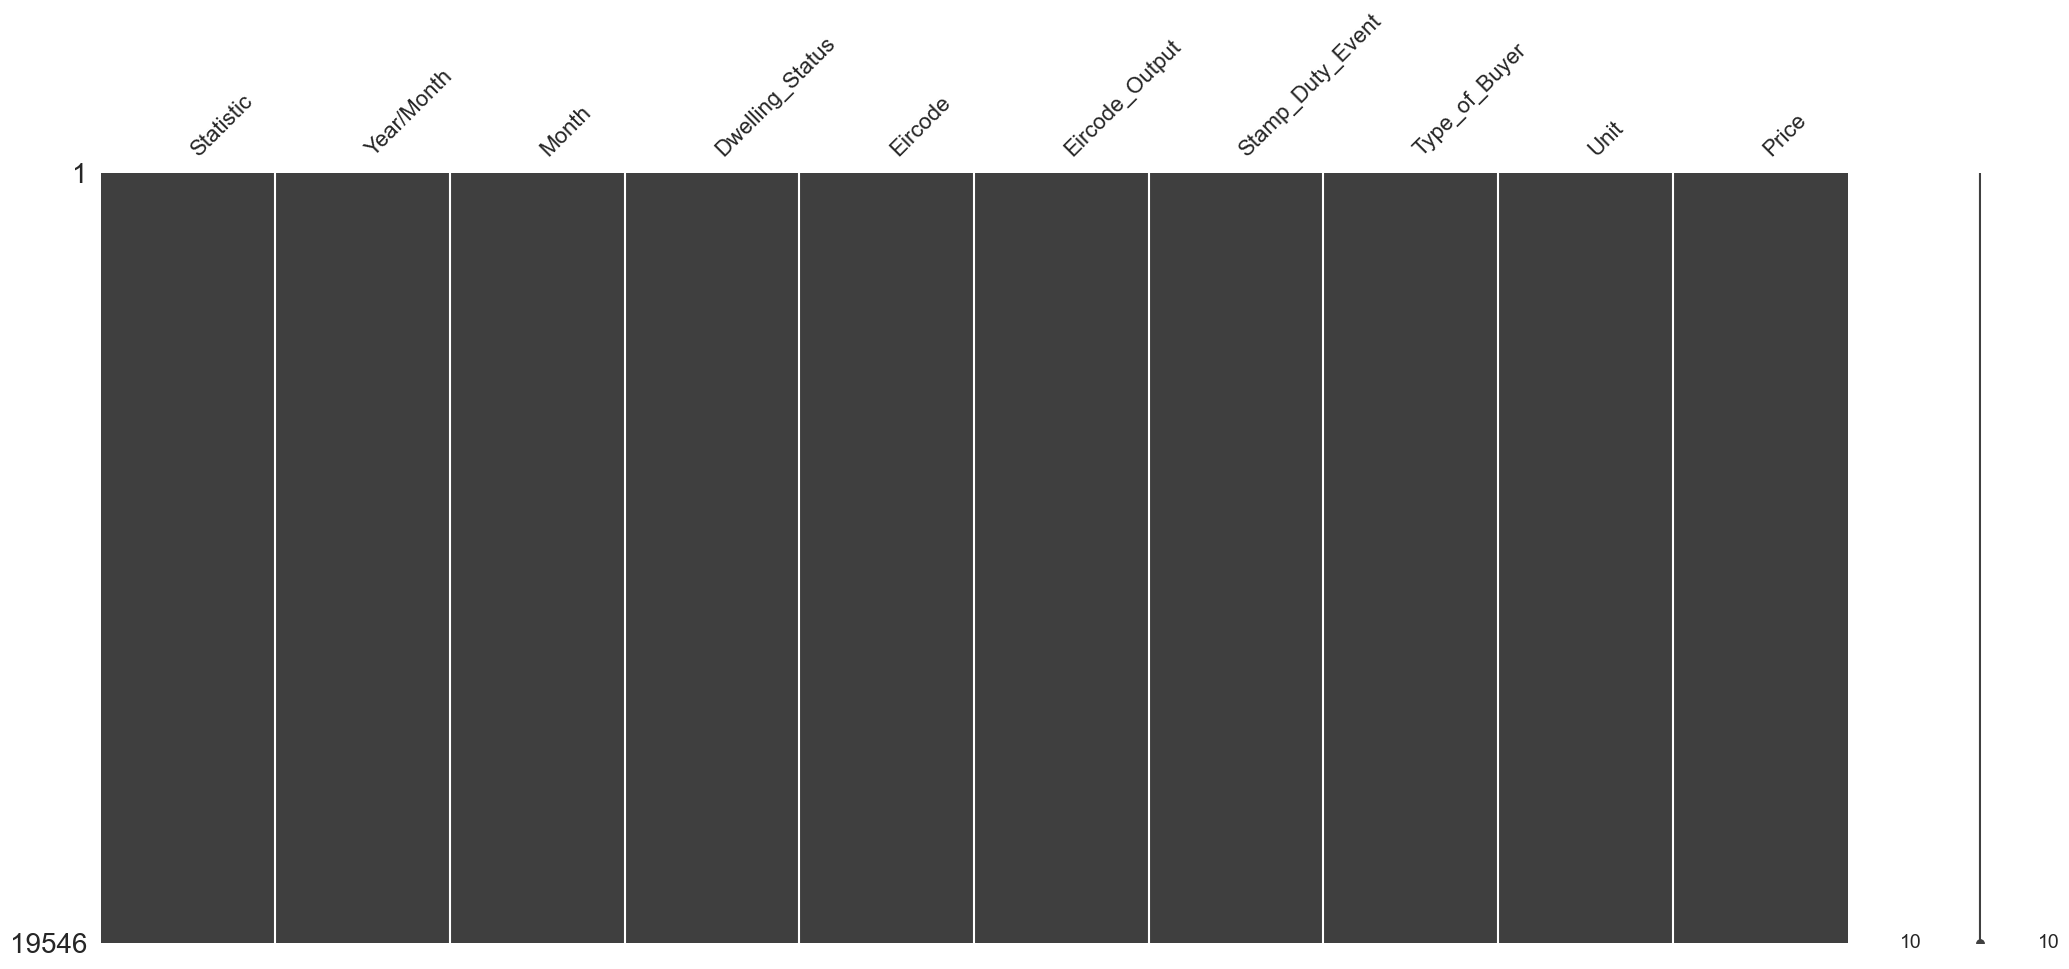

In [31]:
ax = msno.matrix(df.sample(19546))

In [32]:
df.isnull().sum()

Statistic           0
Year/Month          0
Month               0
Dwelling_Status     0
Eircode             0
Eircode_Output      0
Stamp_Duty_Event    0
Type_of_Buyer       0
Unit                0
Price               0
dtype: int64

In [33]:
df[df['Price'].isnull()].head()

,Statistic,Year/Month,Month,Dwelling_Status,Eircode,Eircode_Output,Stamp_Duty_Event,Type_of_Buyer,Unit,Price


### 2.6 Imputing Missing Values

There is no need to imputing missing values

### 2.7 Handling Duplicate Rows

In [34]:
df[df.duplicated()].shape

(0, 10)

In [35]:
df.count()

Statistic           295438
Year/Month          295438
Month               295438
Dwelling_Status     295438
Eircode             295438
Eircode_Output      295438
Stamp_Duty_Event    295438
Type_of_Buyer       295438
Unit                295438
Price               295438
dtype: int64

### 2.8 Type Conversion

In [36]:
df.dtypes

Statistic             int64
Year/Month            int64
Month                object
Dwelling_Status       int64
Eircode              object
Eircode_Output       object
Stamp_Duty_Event      int64
Type_of_Buyer         int64
Unit                float64
Price               float64
dtype: object

In [37]:
df.head(2)

,Statistic,Year/Month,Month,Dwelling_Status,Eircode,Eircode_Output,Stamp_Duty_Event,Type_of_Buyer,Unit,Price
0,1,202201,2022 January,1,All,All,1,1,0.0,3519.0
1,1,202201,2022 January,1,All,All,1,2,0.0,1181.0


### 2.9 Relationships

In [38]:
df.columns

Index(['Statistic', 'Year/Month', 'Month', 'Dwelling_Status', 'Eircode',
       'Eircode_Output', 'Stamp_Duty_Event', 'Type_of_Buyer', 'Unit', 'Price'],
      dtype='object')

,Statistic,Year/Month,Dwelling_Status,Stamp_Duty_Event,Type_of_Buyer,Unit,Price
Statistic,1.000000,-0.004013,-0.003008,-0.001575,-0.055077,0.949845,0.713562
Year/Month,-0.004013,1.000000,-0.000198,-0.002717,-0.002693,-0.004009,0.013605
Dwelling_Status,-0.003008,-0.000198,1.000000,-0.000028,0.000140,-0.003004,-0.014121
Stamp_Duty_Event,-0.001575,-0.002717,-0.000028,1.000000,0.000263,-0.001573,-0.001298
Type_of_Buyer,-0.055077,-0.002693,0.000140,0.000263,1.000000,-0.055016,-0.085167
Unit,0.949845,-0.004009,-0.003004,-0.001573,-0.055016,1.000000,0.721339
Price,0.713562,0.013605,-0.014121,-0.001298,-0.085167,0.721339,1.000000


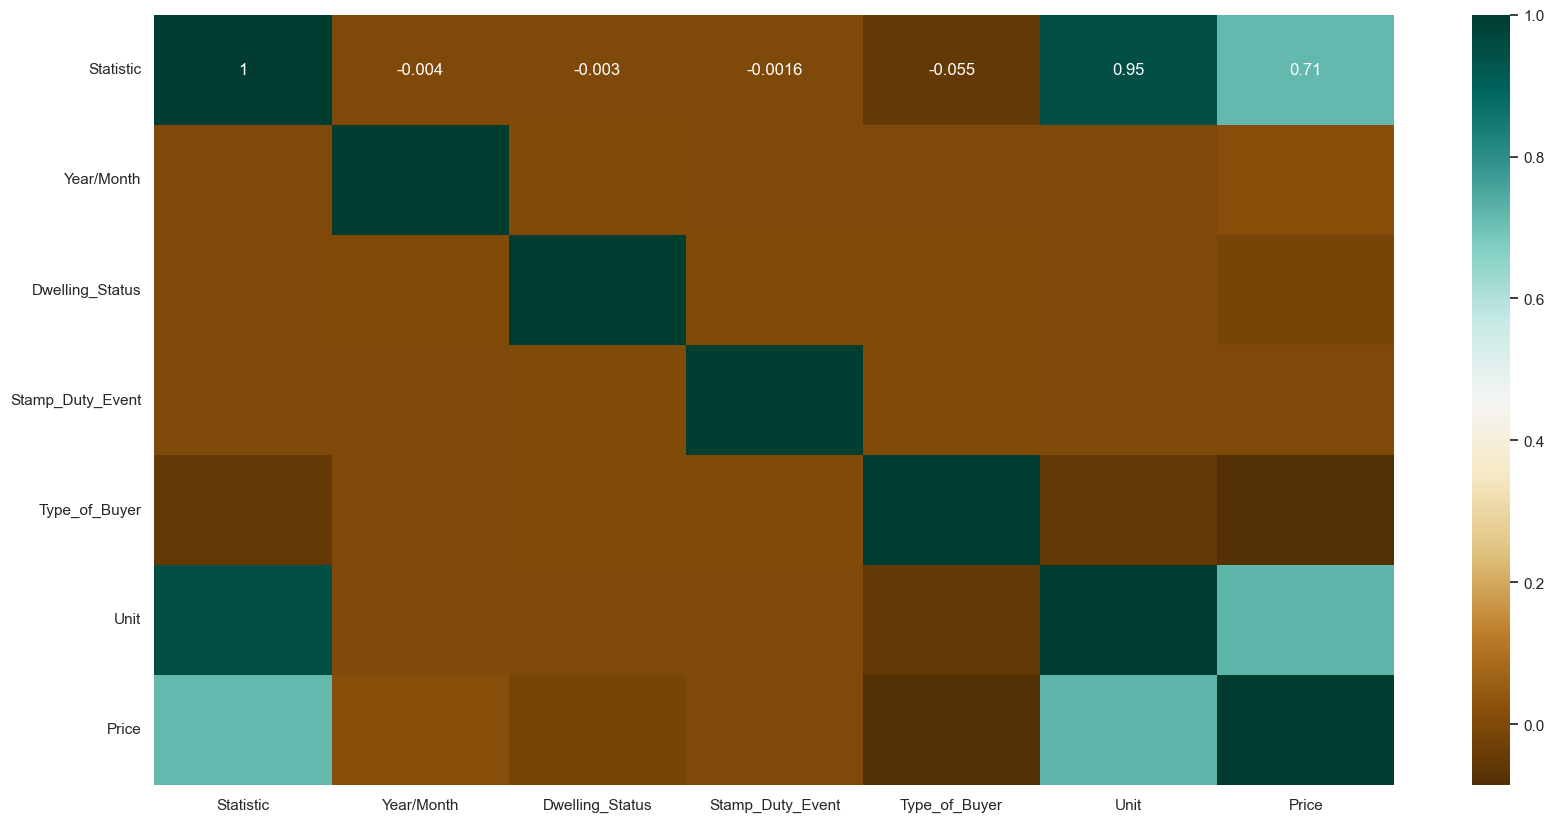

In [39]:
df_numeric = df.select_dtypes(include = ['number'])

plt.figure(figsize = (20, 10))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

### 2.10 Statistical Analysis

In [40]:
df.columns

Index(['Statistic', 'Year/Month', 'Month', 'Dwelling_Status', 'Eircode',
       'Eircode_Output', 'Stamp_Duty_Event', 'Type_of_Buyer', 'Unit', 'Price'],
      dtype='object')

In [41]:
# sns.set_theme(style = "ticks")
# sns.pairplot(df[['Statistic', 'Year/Month', 'Dwelling_Status', 'Stamp_Duty_Event', 'Type_of_Buyer', 'Unit', 'Price']])

<Axes: xlabel='Price', ylabel='Density'>

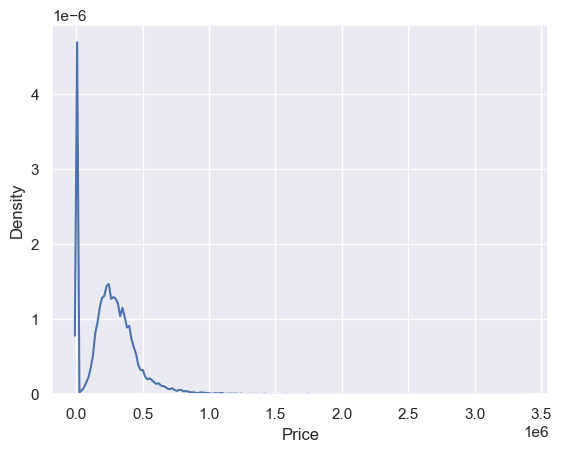

In [42]:
sns.kdeplot(data = df, x = "Price", bw_adjust = .2)

<Axes: >

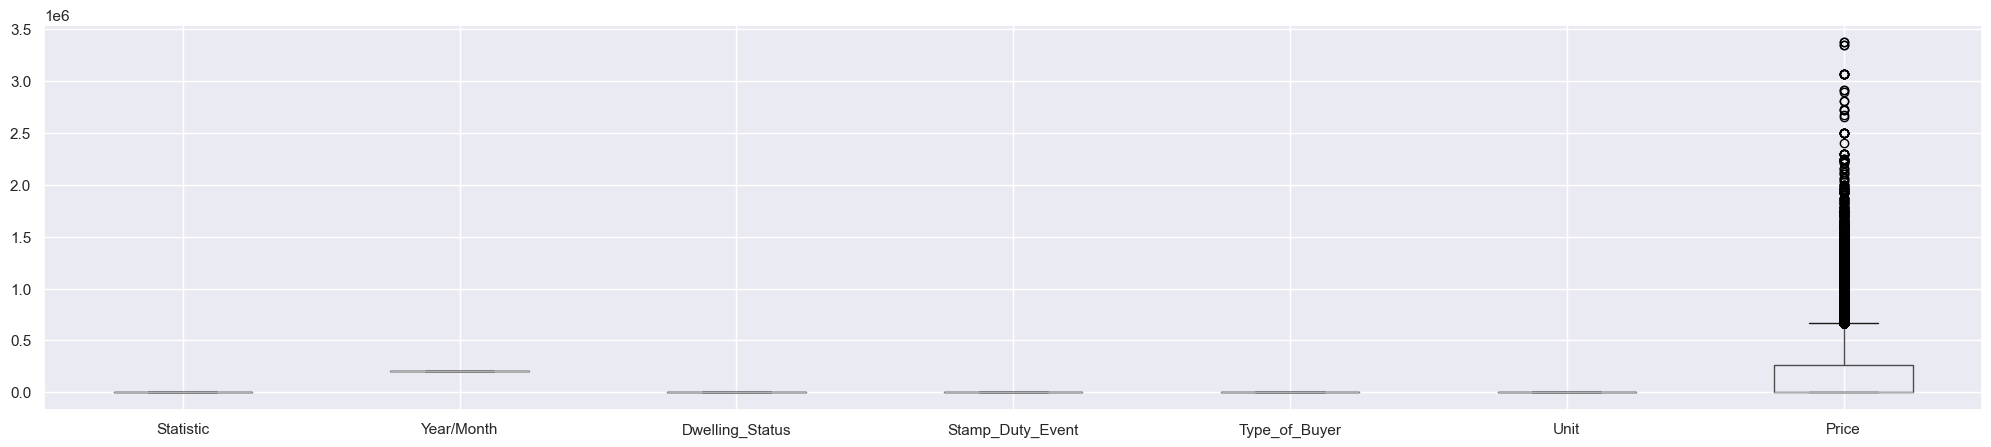

In [43]:
df.boxplot(figsize = (25, 5))

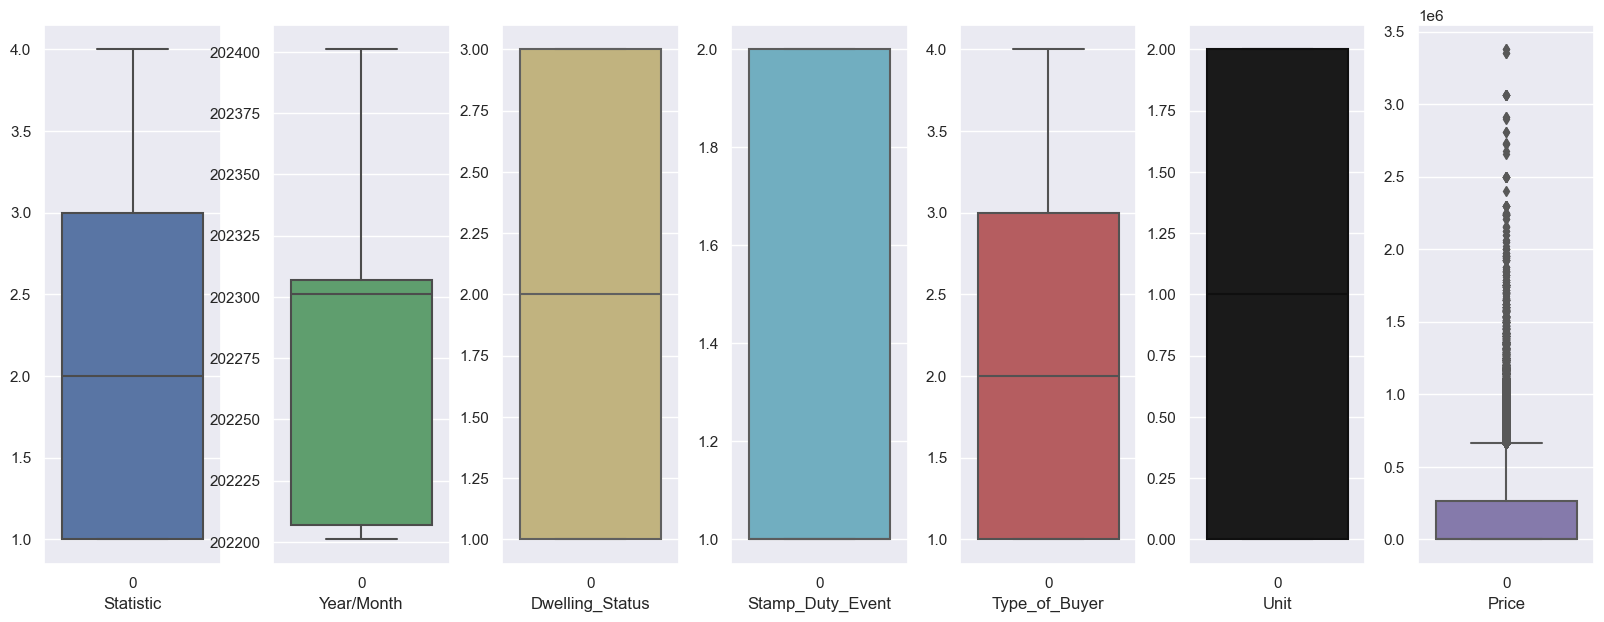

In [44]:
# 'Statistic', 'Year/Month', 'Dwelling_Status', 'Stamp_Duty_Event', 'Type_of_Buyer', 'Unit', 'Price'

fig, ax = plt.subplots(1, 7, figsize = (20, 7))

plt.subplots_adjust(wspace = 0.3) 

sns.boxplot(data = df['Statistic'], ax = ax[0], color = 'b',)
ax[0].set_xlabel('Statistic')
 
sns.boxplot(data = df['Year/Month'], ax = ax[1], color='g')
ax[1].set_xlabel('Year/Month')
 
sns.boxplot(data = df['Dwelling_Status'], ax = ax[2], color='y')
ax[2].set_xlabel('Dwelling_Status')
 
sns.boxplot(data = df['Stamp_Duty_Event'], ax = ax[3], color='c')
ax[3].set_xlabel('Stamp_Duty_Event')

sns.boxplot(data = df['Type_of_Buyer'], ax = ax[4], color='r')
ax[4].set_xlabel('Type_of_Buyer')

sns.boxplot(data = df['Unit'], ax = ax[5], color='k')
ax[5].set_xlabel('Unit')

sns.boxplot(data = df['Price'], ax = ax[6], color='m')
ax[6].set_xlabel('Price')
    
plt.show()

In [45]:
df['Type_of_Buyer'].value_counts()

Type_of_Buyer
1    78492
3    76258
2    74500
4    66188
Name: count, dtype: int64

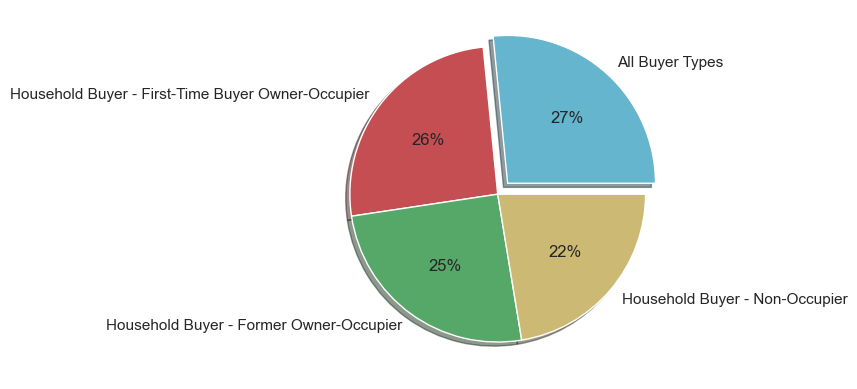

In [46]:
valuesAlbumType = df['Type_of_Buyer'].value_counts()

labels = ['All Buyer Types', 'Household Buyer - First-Time Buyer Owner-Occupier', 'Household Buyer - Former Owner-Occupier', 'Household Buyer - Non-Occupier']
explode = [0.1, 0, 0, 0]
colors = ["c", "r", "g", "y"]

plt.pie(valuesAlbumType, labels = labels, explode = explode, colors = colors, shadow = True, autopct='%.0f%%')
plt.show() 

### 2.11 Dealing Outliers

In [47]:
df_outliers = df.copy()

In [48]:
Q1 = df_outliers.select_dtypes(include = ['number']).quantile(0.25)
Q3 = df_outliers.select_dtypes(include = ['number']).quantile(0.75)
IQR = Q3 - Q1

In [49]:
df_outliers = df_outliers[~((df_outliers.select_dtypes(include = ['number']) < (Q1 - 1.5 * IQR)) | 
                            (df_outliers.select_dtypes(include = ['number']) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [50]:
df.shape, df_outliers.shape

((295438, 10), (290070, 10))

<Axes: >

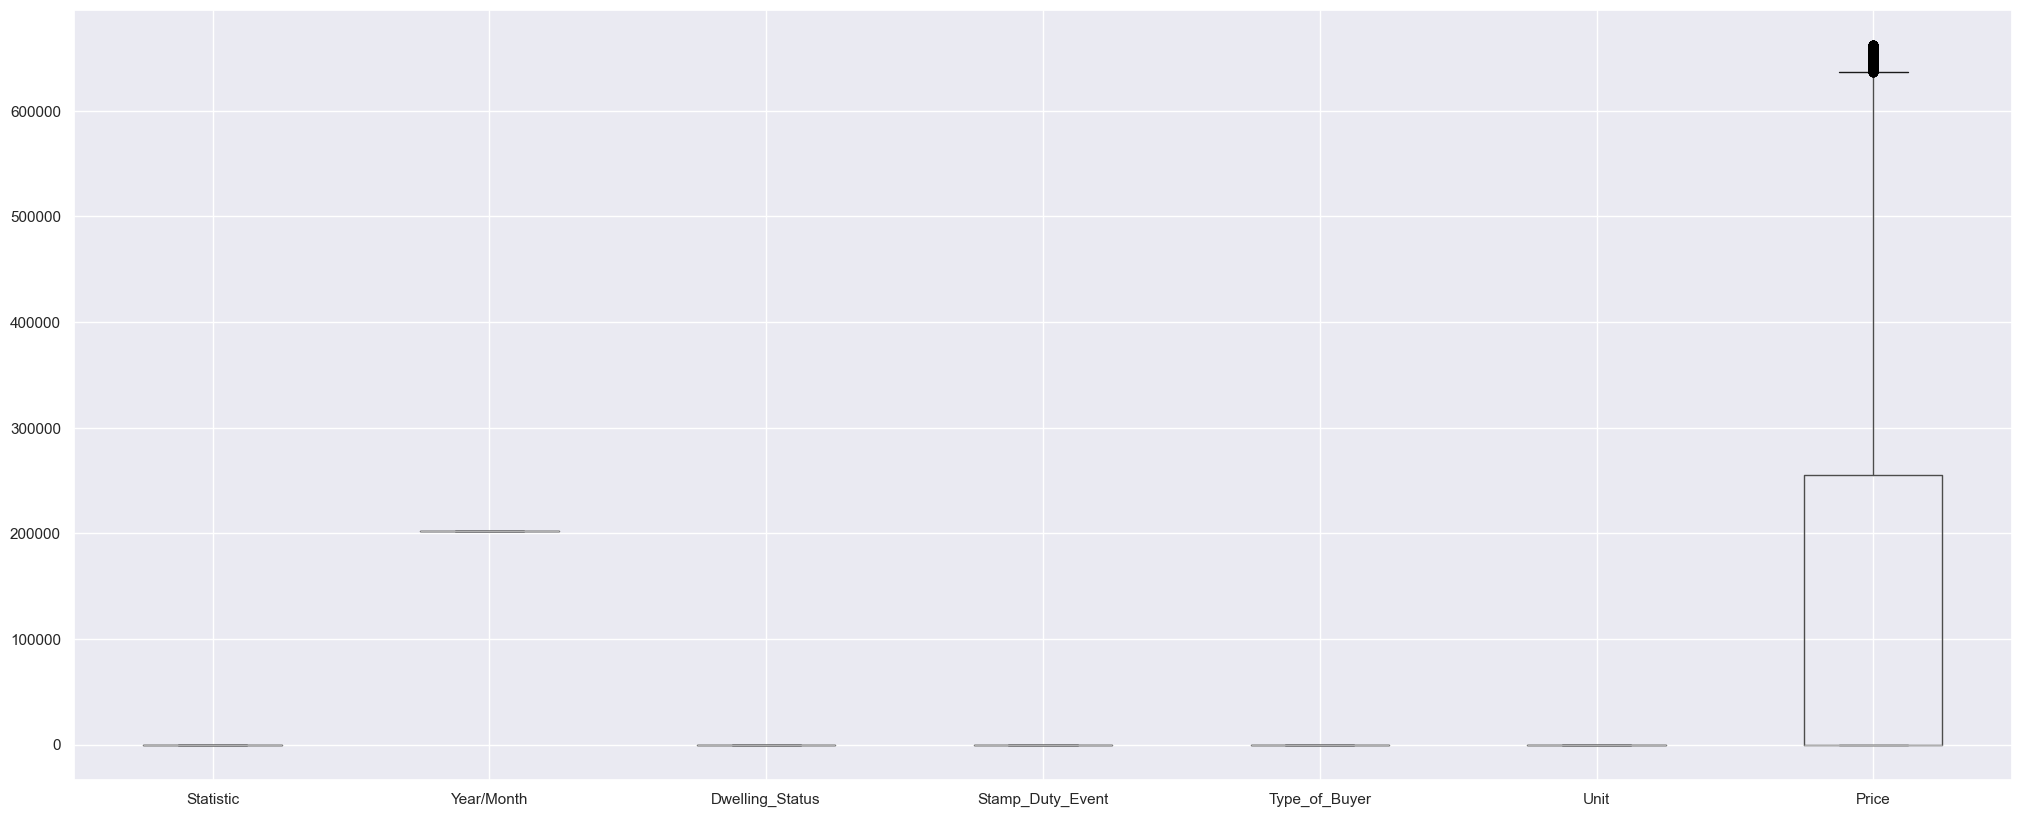

In [51]:
df_outliers.boxplot(figsize = (25, 10))

In [52]:
df_outliers.head(2)

,Statistic,Year/Month,Month,Dwelling_Status,Eircode,Eircode_Output,Stamp_Duty_Event,Type_of_Buyer,Unit,Price
0,1,202201,2022 January,1,All,All,1,1,0.0,3519.0
1,1,202201,2022 January,1,All,All,1,2,0.0,1181.0


### 2.12 Creating Dummies

In [53]:
# df = pd.get_dummies(df, columns=["Statistic", "Dwelling_Status", "Stamp_Duty_Event", "Type_of_Buyer", "Unit"])

In [54]:
# df.head(5)

In [55]:
# df.columns

In [56]:
# df = df.drop(columns = ['Statistic_HPM04C02', 'Statistic_HPM04C03', 'Statistic_HPM04C04', 'Dwelling Status_01', 'Dwelling Status_02', 'Stamp Duty Event_2', 'Type of Buyer_02', 'Type of Buyer_03', 'Type of Buyer_04', 'Unit_Euro Million', 'Unit_Number'])

In [57]:
# df.columns

In [58]:
# df = df.rename(columns= {'Statistic_HPM04C01': 'Statistic', 'Dwelling Status_-': 'Dwelling Status', 'Stamp Duty Event_1': 'Stamp Duty Event', 'Type of Buyer_-': 'Type of Buyer', 'Unit_Euro': 'Unit'})

In [59]:
# df.head()

- Statistic - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- Dwelling Status - 1: All Dwelling Statuses, 2: New and 3: Existing
- Stamp Duty Event - 1: Filings and 2: Executions
- Type of Buyer - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

In [60]:
# df['Statistic'].head() 

# df[(df['Statistic'] == 1) & (df['Type of Buyer'] == '1')].head(10)

### 2.13 Scaling / Transformation

In [61]:
from sklearn import preprocessing

In [62]:
df_scaled = df_outliers.copy()

In [63]:
df.columns

Index(['Statistic', 'Year/Month', 'Month', 'Dwelling_Status', 'Eircode',
       'Eircode_Output', 'Stamp_Duty_Event', 'Type_of_Buyer', 'Unit', 'Price'],
      dtype='object')

In [64]:
# df_scaled[['Statistic', 'Dwelling_Status', 'Stamp_Duty_Event', 'Type_of_Buyer', 'Unit']] = preprocessing.scale(df_outliers[['Statistic', 'Dwelling_Status', 'Stamp_Duty_Event', 'Type_of_Buyer', 'Unit']])

In [65]:
df_scaled.head()

,Statistic,Year/Month,Month,Dwelling_Status,Eircode,Eircode_Output,Stamp_Duty_Event,Type_of_Buyer,Unit,Price
0,1,202201,2022 January,1,All,All,1,1,0.0,3519.0
1,1,202201,2022 January,1,All,All,1,2,0.0,1181.0
2,1,202201,2022 January,1,All,All,1,3,0.0,1803.0
3,1,202201,2022 January,1,All,All,1,4,0.0,535.0
4,1,202201,2022 January,1,All,All,2,1,0.0,2884.0


<Axes: >

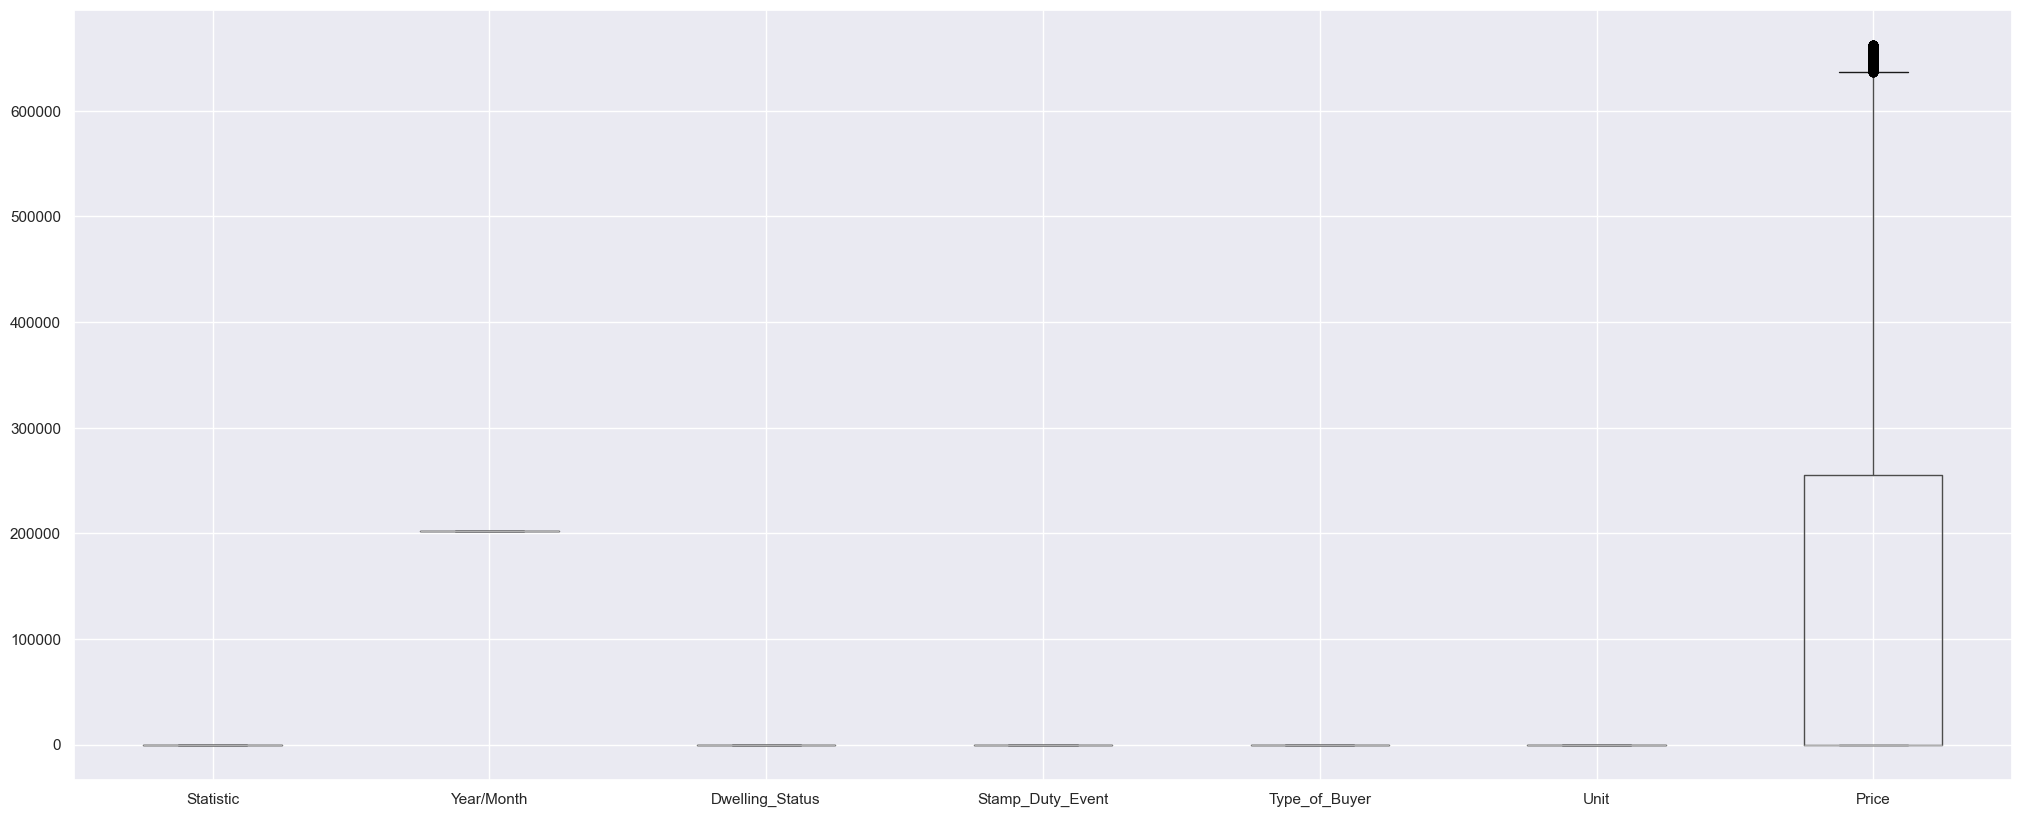

In [66]:
df_scaled.boxplot(figsize = (25, 10))

## 3. Machine Learning

In [67]:
df_scaled.columns

Index(['Statistic', 'Year/Month', 'Month', 'Dwelling_Status', 'Eircode',
       'Eircode_Output', 'Stamp_Duty_Event', 'Type_of_Buyer', 'Unit', 'Price'],
      dtype='object')

In [68]:
no_label = df_scaled.iloc[:, [0, 3, 6, 7, 8]]

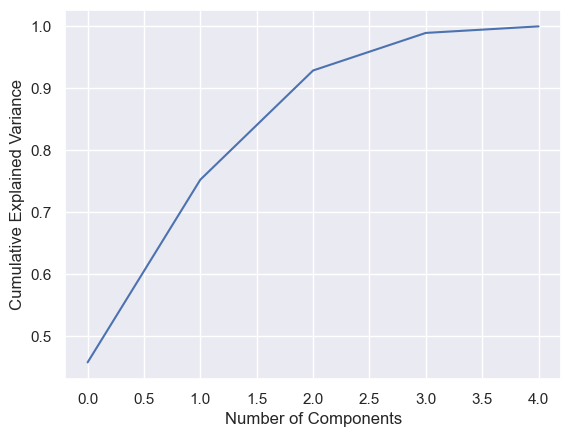

In [69]:
from sklearn.decomposition import PCA
pca = PCA().fit(no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of Components') 
plt.ylabel('Cumulative Explained Variance'); 

In [70]:
# Putting feature variable to X
X = df_scaled.iloc[:, [0, 3, 6, 7, 8]]

# Print the first 5 rows
X.head()

,Statistic,Dwelling_Status,Stamp_Duty_Event,Type_of_Buyer,Unit
0,1,1,1,1,0.0
1,1,1,1,2,0.0
2,1,1,1,3,0.0
3,1,1,1,4,0.0
4,1,1,2,1,0.0


In [71]:
# Putting response variable to y
y = df_scaled['Price']

# Print the first 5 rows
y.head()

0    3519.0
1    1181.0
2    1803.0
3     535.0
4    2884.0
Name: Price, dtype: float64

In [72]:
# random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 , random_state = 100)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((290070, 5), (290070,), (203049, 5), (87021, 5), (203049,), (87021,))

In [73]:
# It is a general convention in scikit-learn that observations are rows, while features are columns. 
# This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np

X_train = X_train.to_numpy()[:, np.newaxis]
X_test = X_test.to_numpy()[:, np.newaxis]

In [76]:
# # import LinearRegression from sklearn
# from sklearn.linear_model import LinearRegression

# # Representing LinearRegression as lr(Creating LinearRegression Object)
# lr = LinearRegression()

# # Fit the model using lr.fit()
# lr.fit(X_train, y_train)

In [77]:
# # Print the intercept and coefficients
# print(lr.intercept_)
# print(lr.coef_)

In [78]:
# # Making predictions on the testing set
# y_pred = lr.predict(X_test)

In [79]:
# type(y_pred)

## Data Dictionary

**STATISTIC -> Statistic ID:**
- HPM04C01: Volume of Sales (Number)
- HPM04C02: Value of Sales (Euro Million)
- HPM04C03: Mean Sale Price (Euro)
- HPM04C04: Median Price (Euro)

**Statistic Label**
- Volume of Sales: Volume of Sales (Number)
- Value of Sales: Value of Sales (Euro Million)
- Mean Sale Price: Mean Sale Price (Euro)
- Median Price: Median Price (Euro)

**TLIST(M1) -> Year Month**
- Range from 2022-Jan to 2024-Jan: "202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308, 202309, 202310, 202311, 202312, 202401"

**Month**
- Rage from 2022 Janeiro to 2024 Janeiro: "'2022 January', '2022 February', '2022 March', '2022 April', '2022 May', '2022 June', '2022 July', '2022 August', '2022 September', '2022 October', '2022 November', '2022 December', '2023 January', '2023 February', '2023 March', '2023 April', '2023 May', '2023 June', '2023 July', '2023 August', '2023 September', '2023 October', '2023 November', '2023 December', '2024 January'"

**C03346V04033 -> Dwelling Status ID**
- '-' - All Dwelling Statuses
- 01 - New
- 02 - Existing

**Dwelling Status**
- All Dwelling Statuses
- New
- Existing

**C03349V04063 -> Eircode ID**
- '-' - All 
- 'A41', 'A42', 'A45', 'A63', 'A67', 'A75', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A91', 'A92', 'A94', 'A96', 'A98', 'C15', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D20', 'D22', 'D24', 'D6W', 'E21', 'E25', 'E32', 'E34', 'E41', 'E45', 'E53', 'E91', 'F12', 'F23', 'F26', 'F28', 'F31', 'F35', 'F42', 'F45', 'F52', 'F56', 'F91', 'F92', 'F93', 'F94', 'H12', 'H14', 'H16', 'H18', 'H23', 'H53', 'H54', 'H62', 'H65', 'H71', 'H91', 'K32', 'K34', 'K36', 'K45', 'K56', 'K67', 'K78', 'N37', 'N39', 'N41', 'N91', 'P12', 'P14', 'P17', 'P24', 'P25', 'P31', 'P32', 'P36', 'P43', 'P47', 'P51', 'P56', 'P61', 'P67', 'P72', 'P75', 'P81', 'P85', 'R14', 'R21', 'R32', 'R35', 'R42', 'R45', 'R51', 'R56', 'R93', 'R95', 'T12', 'T23', 'T34', 'T45', 'T56', 'V14', 'V15', 'V23', 'V31', 'V35', 'V42', 'V92', 'V93', 'V94', 'V95', 'W12', 'W23', 'W34', 'W91', 'X35', 'X42', 'X91', 'Y14', 'Y21', 'Y25', 'Y34', 'Y35'

**Eircode Output -> Eircode**
- 'All'
- Eircodes

**C03341V04028 - Stamp Duty Event ID**
- 1: Filings
- 2: Executions

**Stamp Duty Event** 
- Filings
- Executions

**C03344V04031 -> Type of Buyer ID** 
- '-' - All Buyer Types
- 02 - Household Buyer - First-Time Buyer Owner-Occupier
- 03 - Household Buyer - Former Owner-Occupier
- 04 - Household Buyer - Non-Occupier

**Type of Buyer** 
- All Buyer Types
- Household Buyer - First-Time Buyer Owner-Occupier
- Household Buyer - Former Owner-Occupier
- Household Buyer - Non-Occupier

**UNIT -> Unit**
- Number
- Euro Million
- Euro

**VALUE -> Price**
Price of the property

## References